In [1]:
#reload the modules before running the program
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
from scipy import signal
from scipy.fft import fftshift
from scipy.fft import fft, fftfreq

import matplotlib.pyplot as plt
import matplotlib as mpl

from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import os
import math
import cv2

In [3]:
from datasets import RFData, CameraData, SignalDataset, FuseDatasets
import metrics
import utils
import utils_2 as p_lib

In [4]:
fs = 30
out_len = 1800
t_arr = np.linspace(0, (out_len-1)/fs, out_len)

In [5]:
# NUKS_idx = np.load(r"E:\OSA_project\Emir_Clean\saved_idx\NUKS_idx.npy")
# mode_lock_idx = np.load(r"E:\OSA_project\Emir_Clean\saved_idx\mode_lock_idx.npy")
# movement_idx = np.load(r"E:\OSA_project\Emir_Clean\saved_idx\movement_idx.npy")
path =r"F:\OSA_local_version\OSA_project\Emir_Clean\saved_data"
X = np.load(os.path.join(path, r"thermal_arrv5.npy"))
y = np.load(os.path.join(path, r"gt_arrv5.npy"))


In [6]:
label_y = np.zeros(len(y))

for i in tqdm(range(len(label_y))):
    if((np.mean(y[i][1]) > 0.1) or (np.mean(y[i][2] > 0.1))):
        label_y[i] = 1

100%|██████████| 4900/4900 [00:00<00:00, 25456.55it/s]


In [7]:
PATH = r"F:\OSA_local_version\OSA_project\Emir_Clean\saved_data"
NUKS_idx = np.load(os.path.join(PATH, "NUKS_idxv5.npy"))
mode_lock_idx = np.load(os.path.join(PATH, "mode_lock_idxv5.npy"))
movement_idx = np.load(os.path.join(PATH, "movement_idxv5.npy"))
vid_movement_idx = np.load(os.path.join(PATH, "vid_movement_idxv5.npy"))

In [8]:
def linear_func(m, b, n, length_mode=False):
    if(length_mode == True):
        def func(x):
            return(max(int(m*(x**n) + b), 1))
        return(func)
    else:
        def func(x):
            return(max(int(m*(len(x)**n) + b), 1))
        return(func)

In [9]:
path= r"F:\OSA_local_version\OSA_project\Emir_Clean\patient_folder"
patient_idxs = np.concatenate((np.load(os.path.join(path, "patient_idxs_12.npy")), np.load(os.path.join(path, "patient_idxs_13.npy")), np.load(os.path.join(path, "patient_idxs_20.npy")), np.load(os.path.join(path, "patient_idxs_29.npy")), np.load(os.path.join(path, "patient_idxs_30.npy")), np.load(os.path.join(path, "patient_idxs_36.npy")), np.load(os.path.join(path, "patient_idxs_40.npy"))))

In [11]:
def intraclass_correlation(x, y):
    assert(len(x) != 0)
    mu_x = 0
    for i in range(len(x)):
        mu_x = mu_x + (x[i] + y[i])
    mu_x = mu_x/(2*len(x))

    s_sq = 0
    for i in range(len(x)):
        s_sq  = s_sq  + (x[i] - mu_x)**2 +  (y[i] - mu_x)**2
    s_sq = s_sq/(2*len(x))

    r = 0
    assert(s_sq != 0)
    for i in range(len(x)):
        r = r + (x[i] - mu_x)*(y[i] - mu_x)
    r = r/(len(x)*s_sq)
    return(r)


In [12]:
import utils_2 as p_lib3

  0%|          | 0/1 [00:00<?, ?it/s]

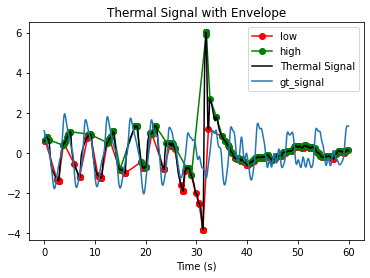

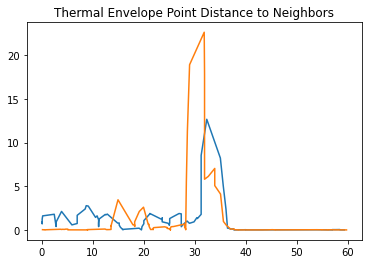

Center List Max:  [958.0] 

Center List Min:  [971.0] 

t:  31.933333333333334 time_arr:  32.36666666666667 

0.43333333333333357 150 

max dist:  101
center_list [958.0]
signal_comps len 2
0th signal component
len(sig[0]) 908 std(sig[0]) 0.8783967150481724
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  20
center_list []
signal_comps len 0
len(lmax):  71 

len(lmin):  70 

step size:  1 

dmin:  22
dmax:  32
lmin:  70 lmax:  71 



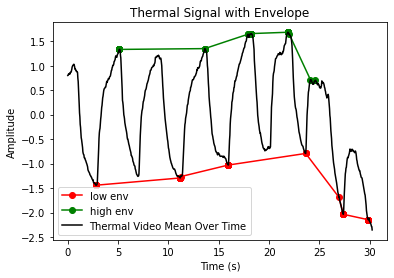

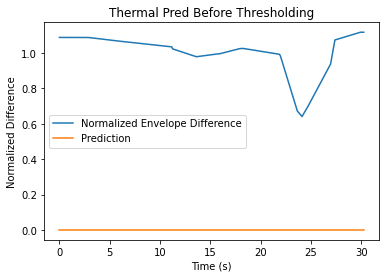

#################################################
1th signal component
len(sig[0]) 792 std(sig[0]) 0.42473051616000096
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  30
center_list []
signal_comps len 0
len(lmax):  136 

len(lmin):  136 

step size:  1 

dmin:  22
dmax:  32
lmin:  136 lmax:  136 



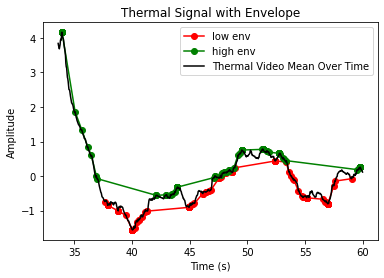

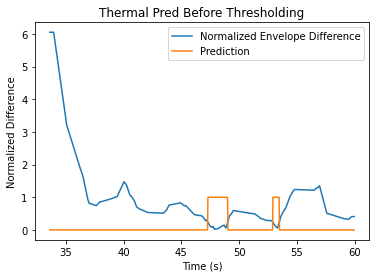

#################################################
gt diff 0 1
pred mean:  0.10333333333333333
OSA mean:  0.0 CSA mean:  0.0
idx:  61


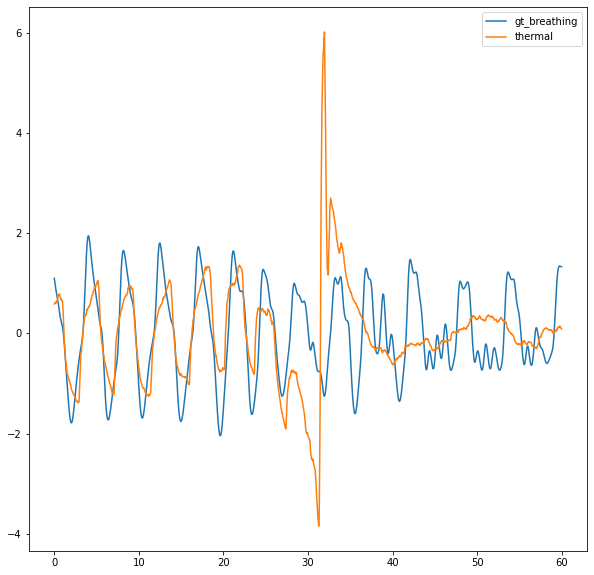

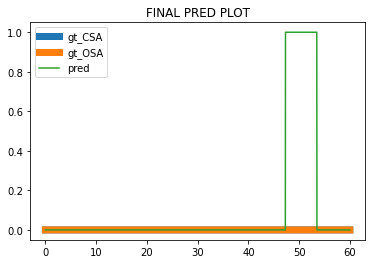

###########################################################################


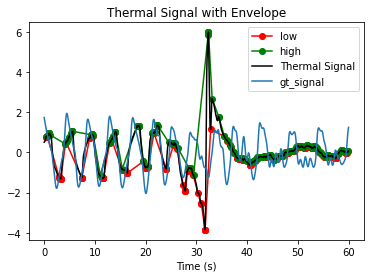

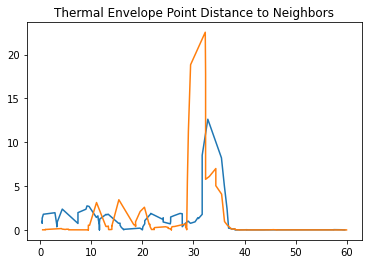

Center List Max:  [971.0] 

Center List Min:  [984.0] 

t:  32.36666666666667 time_arr:  32.8 

0.43333333333333 150 

max dist:  101
center_list [971.0]
signal_comps len 2
0th signal component
len(sig[0]) 921 std(sig[0]) 0.8798948032262324
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  20
center_list []
signal_comps len 0
len(lmax):  70 

len(lmin):  69 

step size:  1 

dmin:  22
dmax:  32
lmin:  69 lmax:  70 



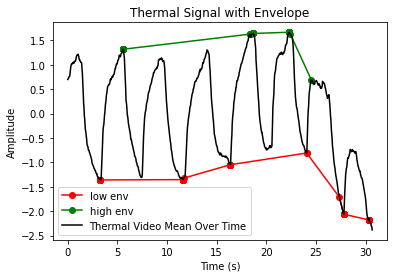

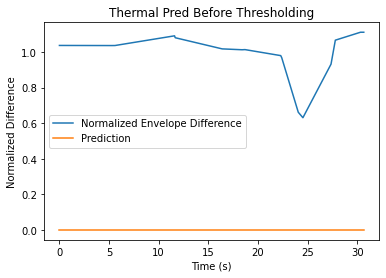

#################################################
1th signal component
len(sig[0]) 779 std(sig[0]) 0.4232164331578333
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  29
center_list []
signal_comps len 0
len(lmax):  134 

len(lmin):  134 

step size:  1 

dmin:  22
dmax:  32
lmin:  134 lmax:  134 



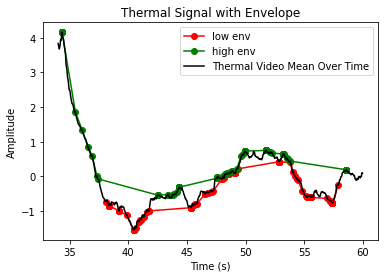

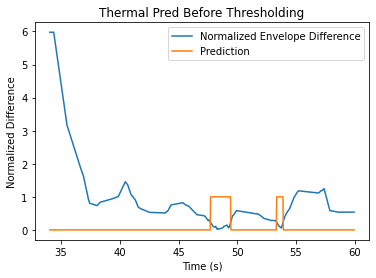

#################################################
gt diff 0 1
pred mean:  0.10333333333333333
OSA mean:  0.0 CSA mean:  0.0
idx:  69


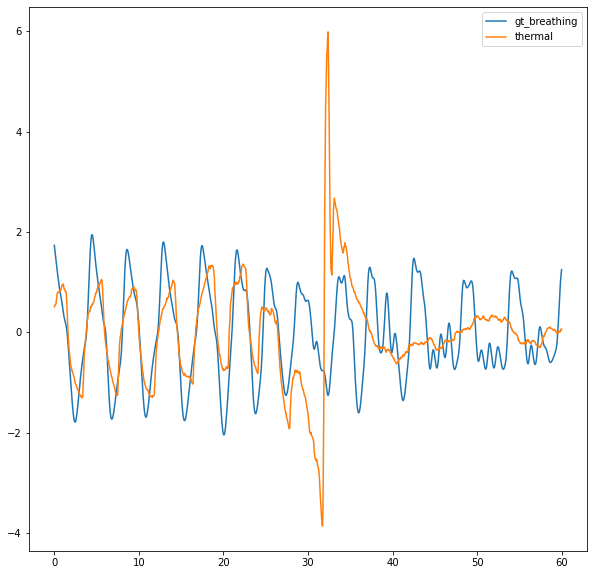

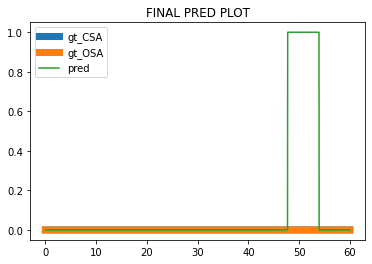

###########################################################################


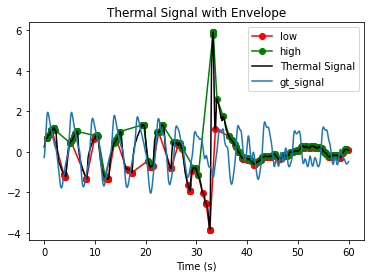

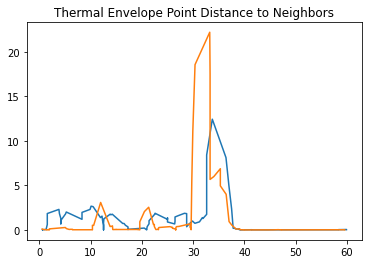

Center List Max:  [999.0] 

Center List Min:  [1012.0] 

t:  33.3 time_arr:  33.733333333333334 

0.4333333333333371 150 

max dist:  99
center_list [999.0]
signal_comps len 2
0th signal component
len(sig[0]) 949 std(sig[0]) 0.8845045768697923
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  17
center_list []
signal_comps len 0
len(lmax):  74 

len(lmin):  73 

step size:  1 

dmin:  22
dmax:  32
lmin:  73 lmax:  74 



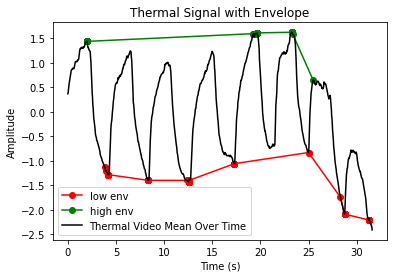

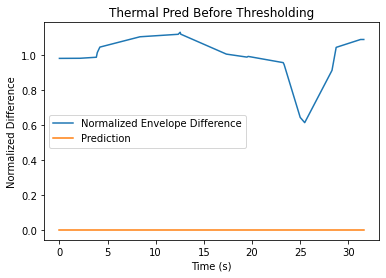

#################################################
1th signal component
len(sig[0]) 751 std(sig[0]) 0.42035603677669464
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  29
center_list []
signal_comps len 0
len(lmax):  128 

len(lmin):  128 

step size:  1 

dmin:  22
dmax:  32
lmin:  128 lmax:  128 



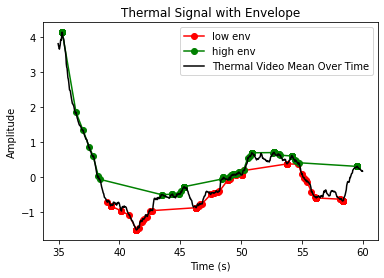

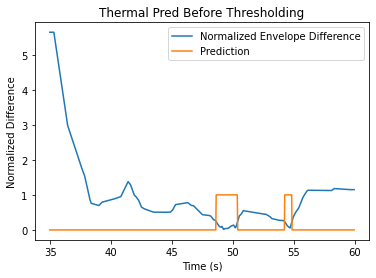

#################################################
gt diff 0 1
pred mean:  0.10388888888888889
OSA mean:  0.0 CSA mean:  0.0
idx:  78


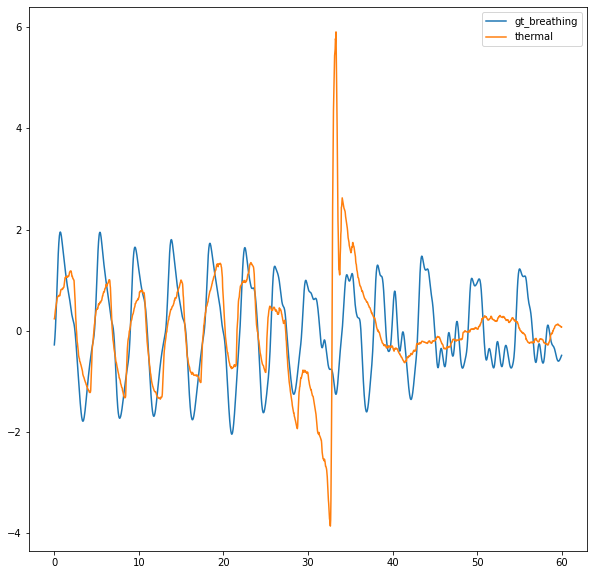

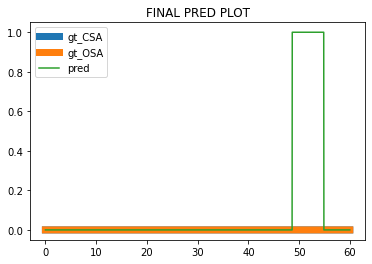

###########################################################################


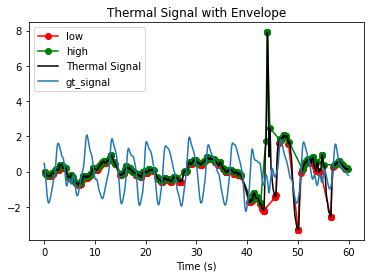

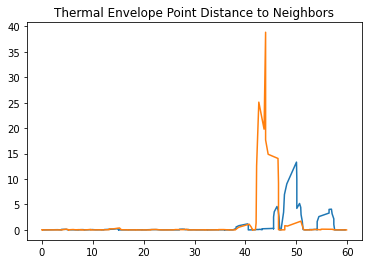

Center List Max:  [1319.0] 

Center List Min:  [1502.0] 

t:  43.96666666666667 time_arr:  50.06666666666666 

6.099999999999994 150 

max dist:  174
center_list [1319.0, 1502.0]
signal_comps len 3
0th signal component
len(sig[0]) 1269 std(sig[0]) 0.5267890046323641
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  19
center_list []
signal_comps len 0
len(lmax):  233 

len(lmin):  233 

step size:  1 

dmin:  22
dmax:  32
lmin:  233 lmax:  233 



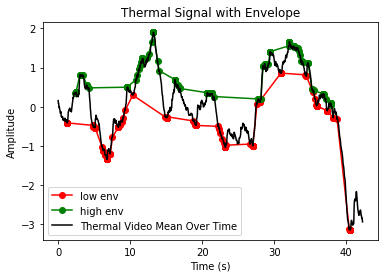

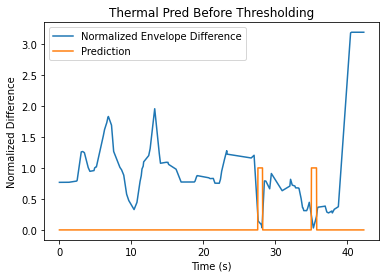

#################################################
1th signal component
len(sig[0]) 83 std(sig[0]) 0.76549016933317
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  36
center_list []
signal_comps len 0
len(lmax):  14 

len(lmin):  14 

step size:  1 

dmin:  22
dmax:  32
lmin:  14 lmax:  14 



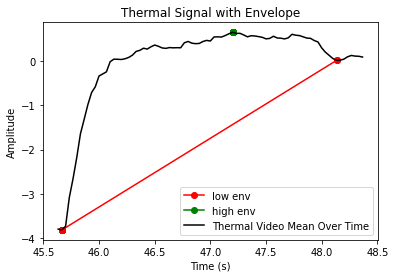

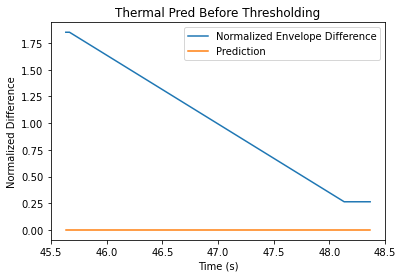

#################################################
2th signal component
len(sig[0]) 248 std(sig[0]) 0.8703568276520713
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  24
center_list []
signal_comps len 0
len(lmax):  34 

len(lmin):  33 

step size:  1 

dmin:  22
dmax:  32
lmin:  33 lmax:  34 



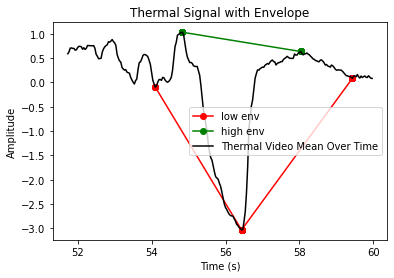

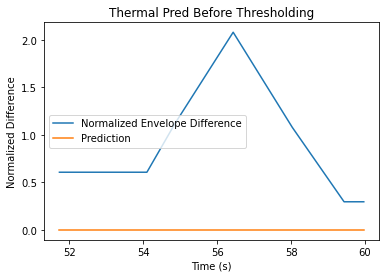

#################################################
gt diff 0 1
pred mean:  0.1361111111111111
OSA mean:  0.0 CSA mean:  0.0
idx:  126


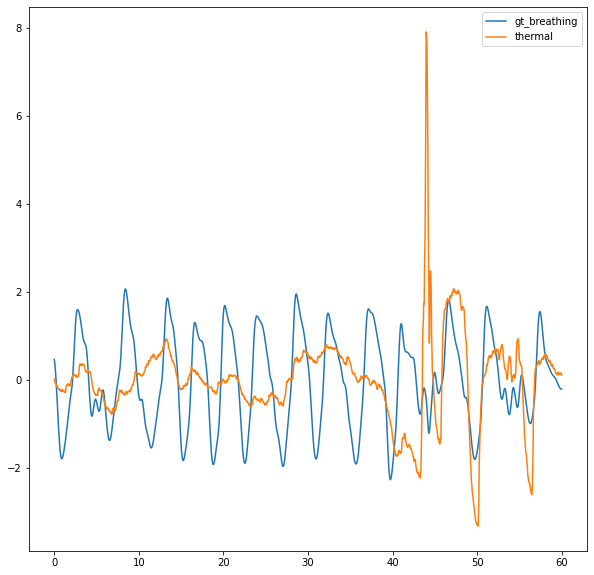

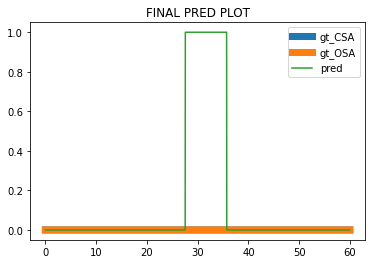

###########################################################################


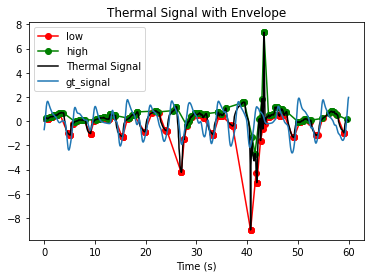

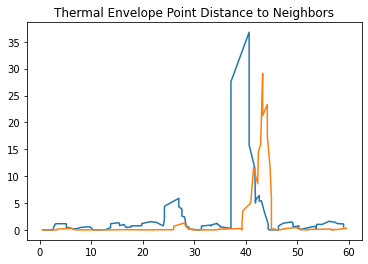

Center List Max:  [1299.0] 

Center List Min:  [1220.0] 

t:  43.3 time_arr:  40.666666666666664 

2.633333333333333 150 

max dist:  165
center_list [1299.0]
signal_comps len 2
0th signal component
len(sig[0]) 1249 std(sig[0]) 0.9733209044507724
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  174
center_list []
signal_comps len 0
len(lmax):  119 

len(lmin):  118 

step size:  1 

dmin:  22
dmax:  32
lmin:  118 lmax:  119 



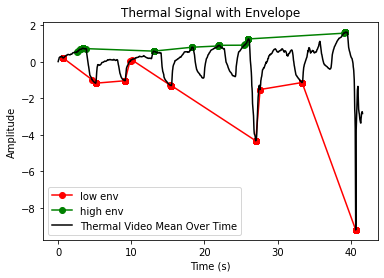

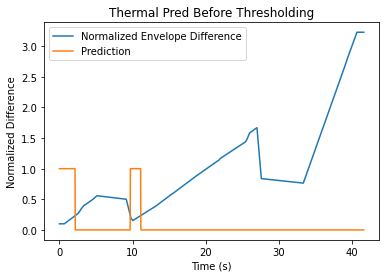

#################################################
1th signal component
len(sig[0]) 451 std(sig[0]) 0.6427615955503861
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  17
center_list []
signal_comps len 0
len(lmax):  38 

len(lmin):  37 

step size:  1 

dmin:  22
dmax:  32
lmin:  37 lmax:  38 



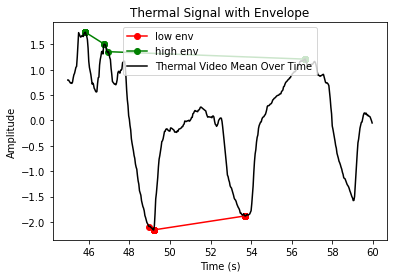

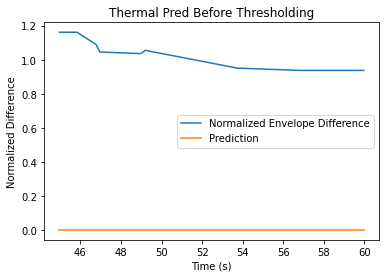

#################################################
gt diff 0 1
pred mean:  0.18555555555555556
OSA mean:  0.0 CSA mean:  0.0
idx:  127


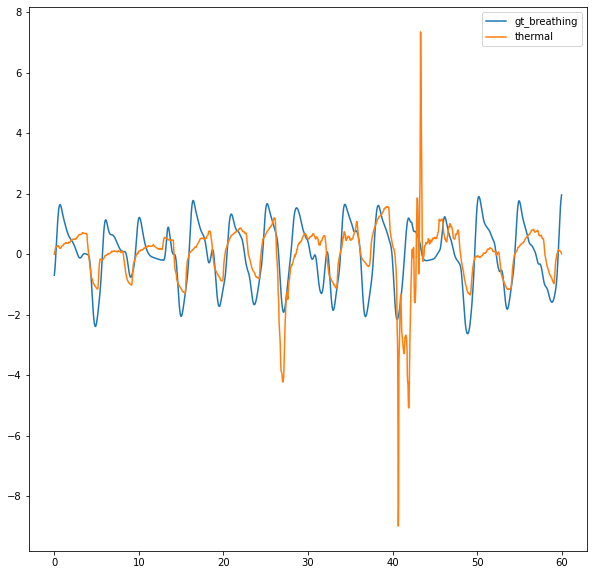

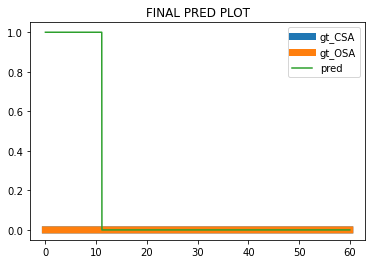

###########################################################################


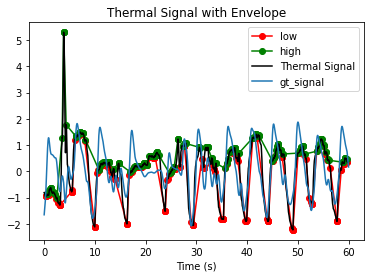

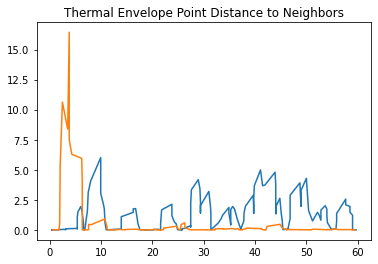

Center List Max:  [115.0] 

Center List Min:  [766.0] 

t:  3.8333333333333335 time_arr:  25.53333333333333 

21.7 150 

max dist:  73
center_list [115.0, 766.0]
signal_comps len 3
0th signal component
len(sig[0]) 65 std(sig[0]) 0.09081058523000585
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  11
center_list []
signal_comps len 0
len(lmax):  12 

len(lmin):  12 

step size:  1 

dmin:  22
dmax:  32
lmin:  12 lmax:  12 



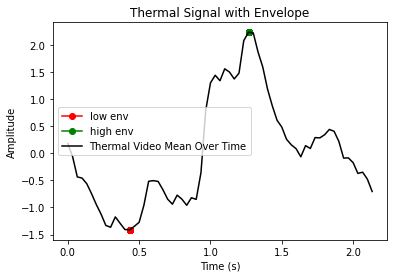

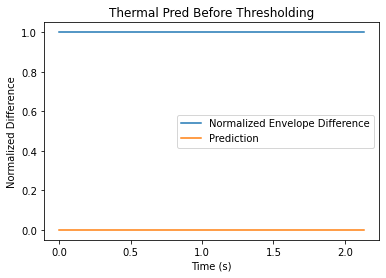

#################################################
1th signal component
len(sig[0]) 551 std(sig[0]) 0.8651045066105477
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  36
center_list []
signal_comps len 0
len(lmax):  74 

len(lmin):  74 

step size:  1 

dmin:  22
dmax:  32
lmin:  74 lmax:  74 



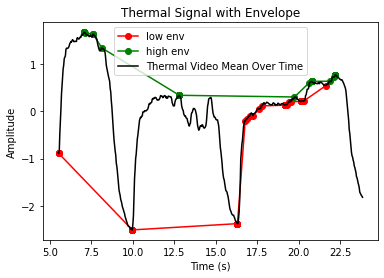

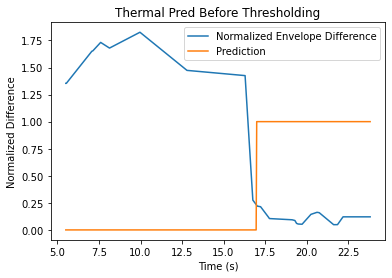

#################################################
2th signal component
len(sig[0]) 984 std(sig[0]) 1.013332469148969
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  21
center_list []
signal_comps len 0
len(lmax):  107 

len(lmin):  106 

step size:  1 

dmin:  22
dmax:  32
lmin:  106 lmax:  107 



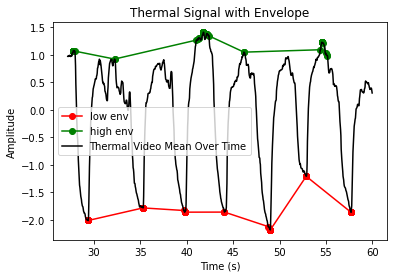

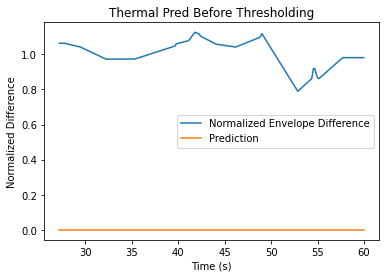

#################################################
gt diff 0 1
pred mean:  0.11444444444444445
OSA mean:  0.0 CSA mean:  0.0
idx:  130


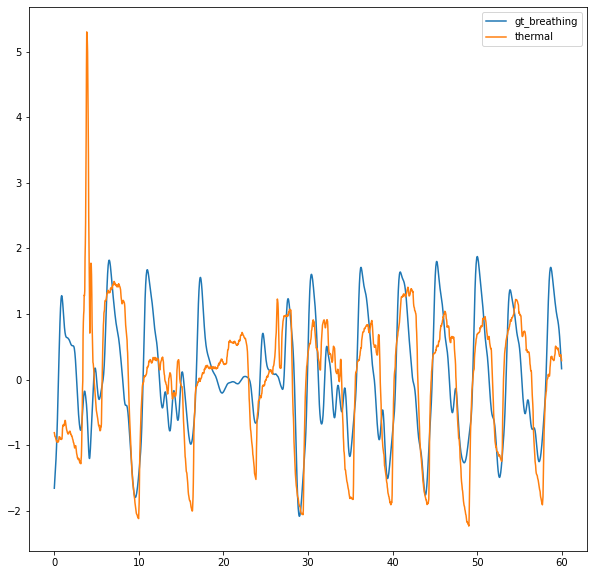

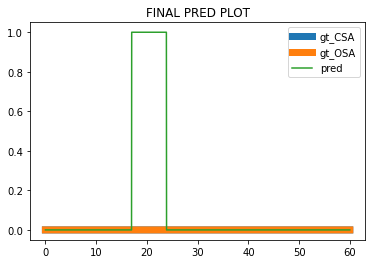

###########################################################################


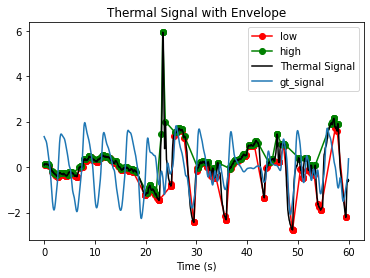

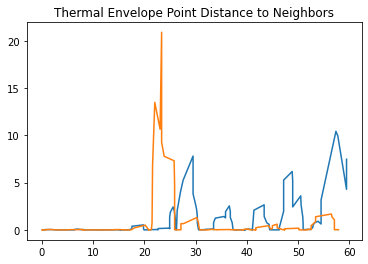

Center List Max:  [701.0] 

Center List Min:  [1465.0] 

t:  23.366666666666667 time_arr:  48.833333333333336 

25.46666666666667 150 

max dist:  94
center_list [701.0, 1465.0]
signal_comps len 3
0th signal component
len(sig[0]) 651 std(sig[0]) 0.4347799328835312
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  12
center_list []
signal_comps len 0
len(lmax):  112 

len(lmin):  111 

step size:  1 

dmin:  22
dmax:  32
lmin:  111 lmax:  112 



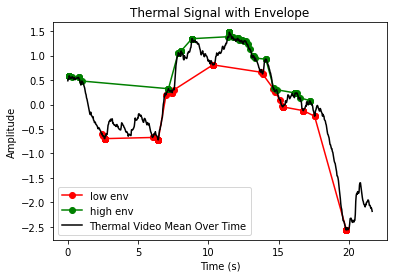

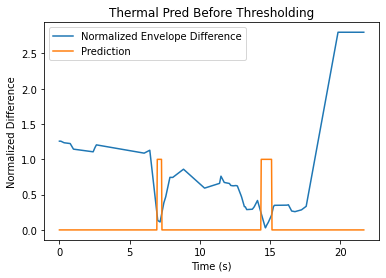

#################################################
1th signal component
len(sig[0]) 664 std(sig[0]) 0.9534922799671296
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  38
center_list []
signal_comps len 0
len(lmax):  90 

len(lmin):  90 

step size:  1 

dmin:  22
dmax:  32
lmin:  90 lmax:  90 



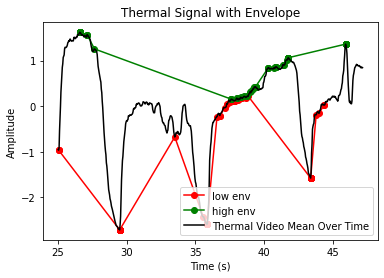

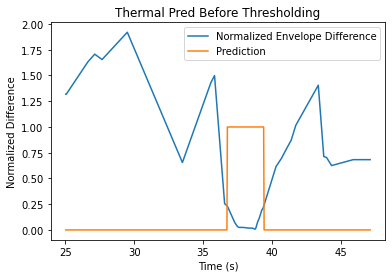

#################################################
2th signal component
len(sig[0]) 285 std(sig[0]) 1.2365286198236185
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  30
center_list []
signal_comps len 0
len(lmax):  22 

len(lmin):  21 

step size:  1 

dmin:  22
dmax:  32
lmin:  21 lmax:  22 



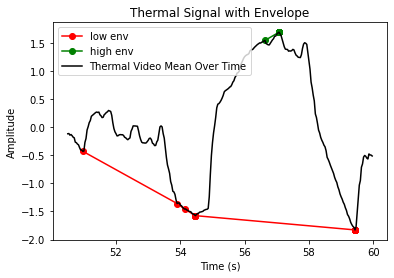

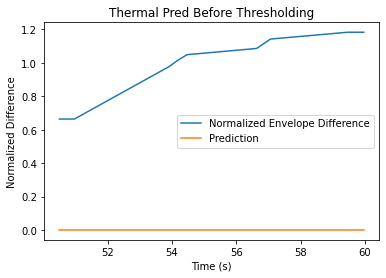

#################################################
gt diff 0 1
pred mean:  0.1361111111111111
OSA mean:  0.0 CSA mean:  0.0
idx:  139


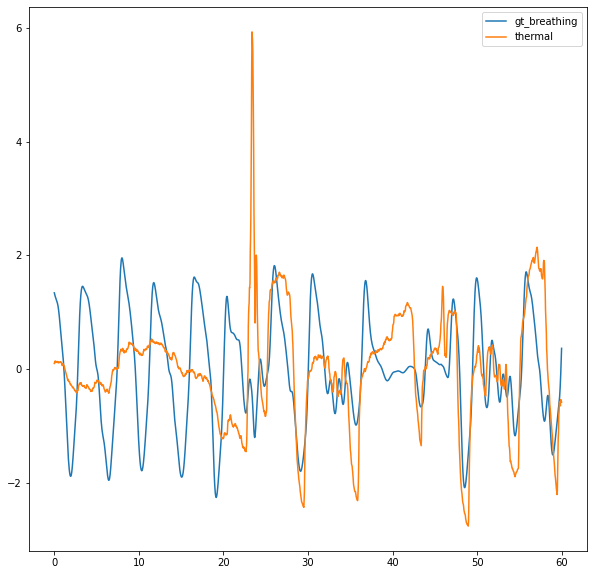

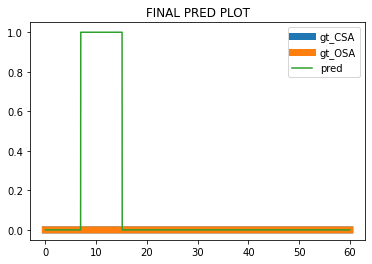

###########################################################################


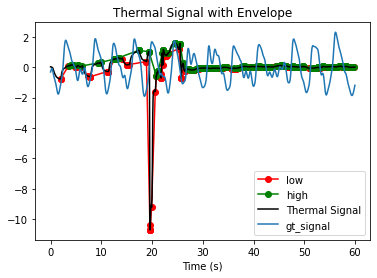

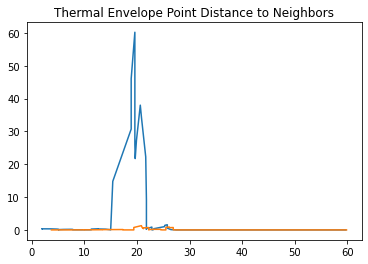

Center List Max:  [] 

Center List Min:  [588.0] 

max dist:  270
center_list [588.0]
signal_comps len 2
0th signal component
len(sig[0]) 538 std(sig[0]) 0.45255227621738264
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  7
center_list []
signal_comps len 0
len(lmax):  27 

len(lmin):  27 

step size:  1 

dmin:  22
dmax:  32
lmin:  27 lmax:  27 



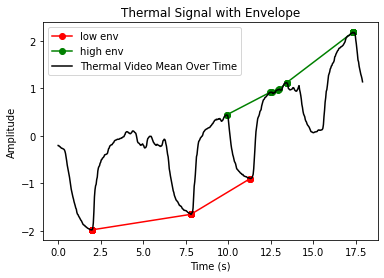

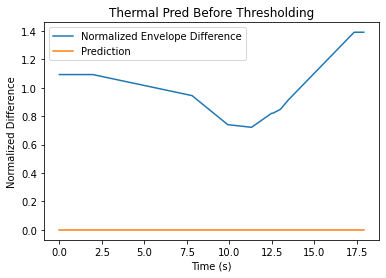

#################################################
1th signal component
len(sig[0]) 1162 std(sig[0]) 0.3759709988331401
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  51
center_list []
signal_comps len 0
len(lmax):  212 

len(lmin):  213 

step size:  1 

dmin:  22
dmax:  32
lmin:  213 lmax:  212 



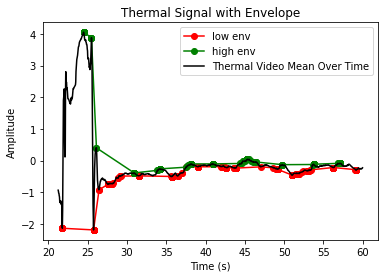

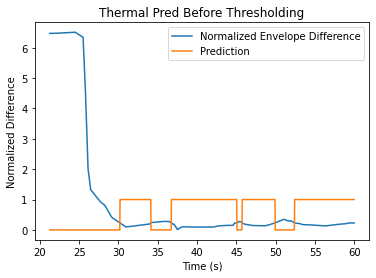

#################################################
gt diff 0 1
pred mean:  0.49666666666666665
OSA mean:  0.0 CSA mean:  0.0
idx:  146


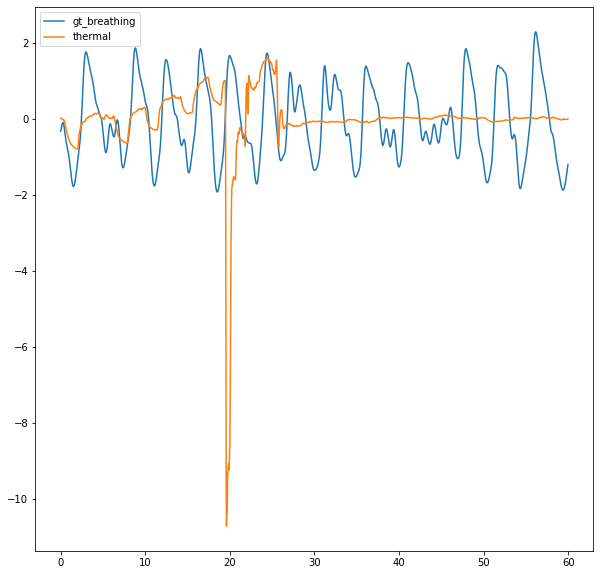

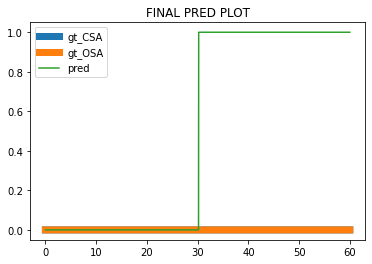

###########################################################################


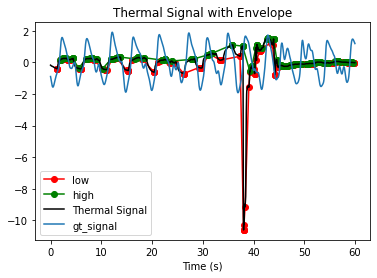

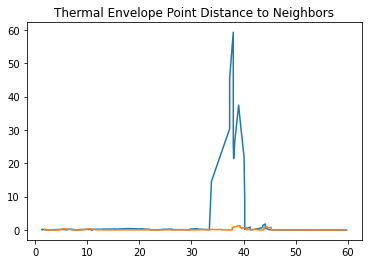

Center List Max:  [] 

Center List Min:  [1141.0] 

max dist:  266
center_list [1141.0]
signal_comps len 2
0th signal component
len(sig[0]) 1091 std(sig[0]) 0.3671426146587735
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  13
center_list []
signal_comps len 0
len(lmax):  85 

len(lmin):  85 

step size:  1 

dmin:  22
dmax:  32
lmin:  85 lmax:  85 



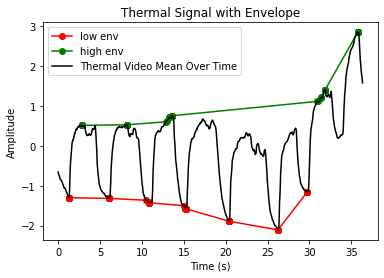

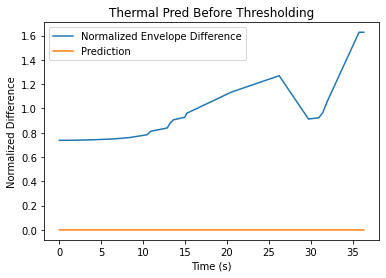

#################################################
1th signal component
len(sig[0]) 609 std(sig[0]) 0.5014555915459126
#################################################
Center List Max:  [] 

Center List Min:  [] 

max dist:  31
center_list []
signal_comps len 0
len(lmax):  106 

len(lmin):  107 

step size:  1 

dmin:  22
dmax:  32
lmin:  107 lmax:  106 



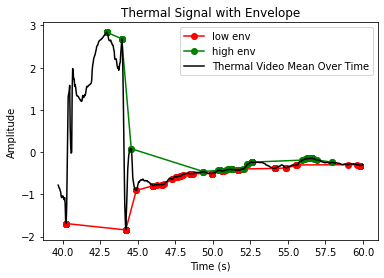

  0%|          | 0/1 [00:16<?, ?it/s]


KeyboardInterrupt: 

In [19]:
# 0.33333333333333337 mode:  mean dmin:  5 dmax:  8
dmax_arr = []
dmin_arr = []
th_arr = []
full_arr = []
prod_arr = []
ths_arr = [0.23333333333333336]#np.linspace(0.1, 0.4, 10)
window_max = 27#np.linspace(2,40, 10, dtype=int)
window_min = 27#np.linspace(2,40, 10, dtype=int)
mode = 'mean'

m_arr = [22]#np.linspace(20, 32, 6, dtype=int)
n_arr = [32]#np.linspace(20, 32, 6, dtype=int)
 # 1.4954545454545456, 0.5
for th in tqdm(ths_arr):
    for n in n_arr:
        for m in m_arr:
            dmin_fun = None #linear_func(m, 0, n, length_mode=False)
            dmin = m
            dmax = n
            gt_arr = []
            pred_arr = []
            MAE_err = 0
            for idx in tqdm(patient_idxs):
                    if((idx not in NUKS_idx) and (idx not in mode_lock_idx) and (idx  in movement_idx) and (idx in vid_movement_idx)): #and (idx not in patient_39) and (idx not in patient_37)):
                        thermal = X[idx]
                        gt_breathing = y[idx][0]
                        gt_OSA = y[idx][1]
                        gt_CSA = y[idx][2]
                        # pred = p_lib3.depth2_apnea_predictor(signal=thermal, time_arr=t_arr, th=th, dmin=dmin, dmax=dmax, dmax_func=None, dmin_func=None, mode=mode, plot=False, prints=False, gt_signal=gt_breathing, include_edges=True, motion_th=4.5)
                        pred = p_lib3.depth2_apnea_predictor(signal=thermal, time_arr=t_arr, th=th, dmin=dmin, dmax=dmax, dmax_func=dmin_fun, dmin_func=dmin_fun, mode=mode, plot=False, prints=False, gt_signal=gt_breathing, include_edges=True, motion_th=4.5)
                        _ , pred = p_lib3.get_apnea_count(pred, center_th=300, plot=False, lims=None)

                        
                        # plt.figure(figsize=(10,10))
                        # print('idx: ', idx)
                        # print('pred mean: ', np.mean(pred))

                        # plt.plot(t_arr, y[idx][0], label='gt_breathing')
                        # plt.plot(t_arr, X[idx], label='thermal')
                        # plt.legend()
                        # plt.show()
                        # plt.plot(t_arr, gt_CSA, linewidth=7.0, label='gt_CSA')
                        # plt.plot(t_arr, gt_OSA, linewidth=7.0, label='gt_OSA')
                        # plt.plot(t_arr, pred, label='pred')
                        # plt.legend()
                        # plt.show()
                        # pred = utils.predict(X[idx], dmin=window_min, dmax=window_max, dmin_func=dmin_func, dmax_func=dmin_func, th=th, mode=mode, plot=False)
                        # print('idx: ', idx)
                        # plt.plot(t_arr, pred, label='pred before')
                        # plt.plot(t_arr, remove_excess(pred), label='pred after')
                        # plt.plot(t_arr, gt_CSA, linewidth=7.0, label='gt_CSA')
                        # plt.plot(t_arr,gt_OSA, linewidth=7.0, label='gt_OSA')
                        # plt.legend()
                        # plt.show()

                        if(np.mean(pred) > 0.08666666666666667):
                            pred_arr.append(1)
                        else:
                            pred_arr.append(0)

                        if((np.mean(gt_OSA) > 0.05) or (np.mean(gt_CSA) > 0.05)):# or (np.mean(gt_hp) > 0.1)):
                            gt_arr.append(1)
                        else:
                            gt_arr.append(0)
                    
                        if((gt_arr[-1] != pred_arr[-1])):
                            p_lib3.depth2_apnea_predictor(signal=thermal, time_arr=t_arr, th=th, dmin=dmin, dmax=dmax, dmax_func=dmin_fun, dmin_func=dmin_fun, mode=mode, plot=True, prints=True, gt_signal=gt_breathing, include_edges=True, motion_th=4.5)

                            print('gt diff', gt_arr[-1], pred_arr[-1])
                            print('pred mean: ', np.mean(pred))
                            print('OSA mean: ', np.mean(gt_OSA), 'CSA mean: ', np.mean(gt_CSA))
                            plt.figure(figsize=(10,10))
                            print('idx: ', idx)
                            plt.plot(t_arr, y[idx][0], label='gt_breathing')
                            plt.plot(t_arr, X[idx], label='thermal')
                            plt.legend()
                            plt.show()
                            plt.plot(t_arr, gt_CSA, linewidth=7.0, label='gt_CSA')
                            plt.plot(t_arr,gt_OSA, linewidth=7.0, label='gt_OSA')
                            plt.plot(t_arr, pred, label='pred')
                            plt.title('FINAL PRED PLOT')
                            plt.legend()
                            plt.show()
                            print(r"###########################################################################")
                        MAE_err = MAE_err + np.mean(abs(pred  - np.logical_or(gt_CSA, gt_OSA)))
            print('Mean Absolute Error: ', MAE_err/len(patient_idxs))
            # print('interclass_correlation: ', intraclass_correlation(pred_arr, gt_arr))
            precision, recall, accuracy, confusion_matrix = utils.get_stats(np.array(pred_arr), np.array(gt_arr))                    
            prod_arr.append(precision*recall / (precision + recall))
            if(dmin_fun is not None):
                full_arr.append((th, mode, m, n, recall, precision, accuracy, confusion_matrix))
            else:
                full_arr.append((th, mode, window_min, window_max, recall, precision, accuracy, confusion_matrix))
            dmax_arr.append(window_max)
            dmin_arr.append(window_min)
            th_arr.append(th)
if(len(prod_arr) > 1):
    for i in range(len(prod_arr)):
        if(math.isnan(prod_arr[i])):
            prod_arr[i] = 0
    
    best_idxs = np.argsort(prod_arr)[::-1]
    print((prod_arr[best_idxs[0]], full_arr[best_idxs[0]]))
else:
    print(prod_arr[0], full_arr[0])

In [58]:
if(len(prod_arr) > 1):
    for i in range(len(prod_arr)):
        if(math.isnan(prod_arr[i])):
            prod_arr[i] = 0
    
    best_idxs = np.argsort(prod_arr)[::-1]
    print((prod_arr[best_idxs[0]], full_arr[best_idxs[0]]))
else:
    print(prod_arr[0], full_arr[0])
#(0.2095238095238095, (0.23333333333333336, 'mean', 22, 32, 0.8461538461538461, 0.27848101265822783, 0.7813620071684588, array([[ 22,   4],
#      [ 57, 196]])))

# (0.21296296296296297, (0.23333333333333336, 'mean', 22, 32, 0.8846153846153846, 0.2804878048780488, 0.7777777777777778, array([[ 23,   3],
#        [ 59, 194]])))


0.21296296296296297 (0.23333333333333336, 'mean', 22, 32, 0.8846153846153846, 0.2804878048780488, 0.7777777777777778, array([[ 23,   3],
       [ 59, 194]]))


In [ ]:

tp = 0 + 34 + 0 + 0 + 0 + 0 + 0 + 0 
fn = 0 + 6 + 0 + 0 + 0 + 0 + 1 + 0 
fp = 4 + 9 + 4 + 3 + 0 + 0 + 1 + 0 
tn = 183 + 241 + 171 + 429 + 155 + 484 + 517 + 339 




tp = 34 + 5
fn = 7 - 7
fp = 15 - 4
tn = 2041 + 1
try:
    # Attempt to perform the division
    precision = tp / (tp + fp)
except ZeroDivisionError:
    precision = math.nan

try:
    recall = tp / (tp + fn)
except ZeroDivisionError:
    recall = math.nan

try:
    accuracy = (tp + tn)/ (tp + tn + fp + fn)
except ZeroDivisionError:
    accuracy = math.nan

try:
    tpr = tp / (tp + fn)
except ZeroDivisionError:
    tpr = math.nan

try:
    fpr = fp / (fp + tn)
except ZeroDivisionError:
    fpr = math.nan

confusion_matrix = np.array([[tp, fn], [fp, tn]])
print(precision, recall, accuracy, confusion_matrix)